# Data Understanding


Tahap ini adalah langkah awal dalam proyek machine learning di mana tujuannya adalah untuk mengenal dan memahami dataset yang akan digunakan, termasuk memuat data dan melihat karakteristik dasarnya.

In [1]:
import kagglehub
path = kagglehub.dataset_download("meirnizri/cellphones-recommendations")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/cellphones-recommendations


In [3]:
import pandas as pd

cellphones_data_df = pd.read_csv('/kaggle/input/cellphones-recommendations/cellphones data.csv')
cellphones_ratings_df = pd.read_csv('/kaggle/input/cellphones-recommendations/cellphones ratings.csv')
cellphones_users_df = pd.read_csv('/kaggle/input/cellphones-recommendations/cellphones users.csv')

print('Jumlah data cellphones: ', len(cellphones_data_df.cellphone_id.unique()))
print('Jumlah data rating tiap cellphones: ', len(cellphones_ratings_df.cellphone_id.unique()))
print('Jumlah data pengguna cellphones: ', len(cellphones_users_df.user_id.unique()))

Jumlah data cellphones:  33
Jumlah data rating tiap cellphones:  33
Jumlah data pengguna cellphones:  99


# Univariate EDA

Sel ini menandai dimulainya analisis terhadap setiap variabel secara individual untuk memahami distribusi, tipe data, dan informasi penting lainnya dari masing-masing fitur dalam dataset.

In [4]:
cellphones_data_df.head()

,cellphone_id,brand,model,operating system,internal memory,RAM,performance,main camera,selfie camera,battery size,screen size,weight,price,release date
0,0,Apple,iPhone SE (2022),iOS,128,4,7.23,12,7,2018,4.7,144,429,18/03/2022
1,1,Apple,iPhone 13 Mini,iOS,128,4,7.72,12,12,2438,5.4,141,699,24/09/2021
2,2,Apple,iPhone 13,iOS,128,4,7.75,12,12,3240,6.1,174,699,24/09/2021
3,3,Apple,iPhone 13 Pro,iOS,256,6,7.94,12,12,3065,6.1,204,999,24/09/2021
4,4,Apple,iPhone 13 Pro Max,iOS,256,6,8.01,12,12,4352,6.7,240,1199,24/09/2021


In [5]:
cellphones_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cellphone_id      33 non-null     int64  
 1   brand             33 non-null     object 
 2   model             33 non-null     object 
 3   operating system  33 non-null     object 
 4   internal memory   33 non-null     int64  
 5   RAM               33 non-null     int64  
 6   performance       33 non-null     float64
 7   main camera       33 non-null     int64  
 8   selfie camera     33 non-null     int64  
 9   battery size      33 non-null     int64  
 10  screen size       33 non-null     float64
 11  weight            33 non-null     int64  
 12  price             33 non-null     int64  
 13  release date      33 non-null     object 
dtypes: float64(2), int64(8), object(4)
memory usage: 3.7+ KB


In [6]:
print('Banyak data: ', len(cellphones_data_df.cellphone_id.unique()))
print('Jenis brand yang ada pada data cellphones: ', cellphones_data_df.brand.unique())

Banyak data:  33
Jenis brand yang ada pada data cellphones:  ['Apple' 'Asus' 'Samsung' 'Google' 'OnePlus' 'Oppo' 'Vivo' 'Xiaomi' 'Sony'
 'Motorola']


In [7]:
print(cellphones_users_df.shape)

(99, 4)


In [8]:
cellphones_users_df.head()

,user_id,age,gender,occupation
0,0,38,Female,Data analyst
1,1,40,Female,team worker in it
2,6,55,Female,IT
3,8,25,Female,Manager
4,10,23,Male,worker


In [9]:
cellphones_ratings_df.head()

,user_id,cellphone_id,rating
0,0,30,1
1,0,5,3
2,0,10,9
3,0,9,3
4,0,23,2


In [10]:
cellphones_ratings_df.describe()

,user_id,cellphone_id,rating
count,990.000000,990.000000,990.000000
mean,136.373737,16.421212,6.700000
std,80.664654,9.473466,2.639036
min,0.000000,0.000000,1.000000
25%,74.000000,8.000000,5.000000
50%,128.000000,16.000000,7.000000
75%,226.000000,25.000000,9.000000
max,258.000000,32.000000,18.000000


In [11]:
print('Jumlah userID: ', len(cellphones_ratings_df.user_id.unique()))
print('Jumlah placeID: ', len(cellphones_ratings_df.cellphone_id.unique()))
print('Jumlah data cellphones_ratings_df: ', len(cellphones_ratings_df))

Jumlah userID:  99
Jumlah placeID:  33
Jumlah data cellphones_ratings_df:  990


# Data Preprocessing

 Kode di bawah sel ini akan fokus pada penggabungan beberapa sumber data (misalnya, ratings, users, dan cellphones) menjadi satu dataframe yang komprehensif untuk analisis lebih lanjut.

In [12]:
import numpy as np

cellphones_all = np.concatenate((
    cellphones_data_df.cellphone_id.unique(),
))

cellphones_all = np.sort(np.unique(cellphones_all))

print('Jumlah seluruh data cellphones berdasarkan user_id: ', len(cellphones_all))

Jumlah seluruh data cellphones berdasarkan user_id:  33


In [13]:
user_all = np.concatenate((
    cellphones_users_df.user_id.unique(),
))

user_all = np.sort(np.unique(user_all))

print('Jumlah seluruh user: ', len(user_all))

Jumlah seluruh user:  99


In [14]:
cellphones_info = pd.concat([cellphones_data_df])

cellphones = pd.merge(cellphones_ratings_df, cellphones_info , on='cellphone_id', how='left')
cellphones

,user_id,cellphone_id,rating,brand,model,operating system,internal memory,RAM,performance,main camera,selfie camera,battery size,screen size,weight,price,release date
0,0,30,1,Motorola,Moto G Play (2021),Android,32,3,1.42,13,5,5000,6.5,204,159,14/01/2021
1,0,5,3,Apple,iPhone XR,iOS,64,3,4.22,12,7,2942,6.1,194,236,26/10/2018
2,0,10,9,Samsung,Galaxy S22,Android,128,8,8.81,50,10,3700,6.1,167,528,25/02/2022
3,0,9,3,Samsung,Galaxy A53,Android,128,6,3.79,64,32,5000,6.5,189,312,24/03/2022
4,0,23,2,Vivo,X80 Pro,Android,256,8,9.81,50,32,4700,6.7,215,872,29/04/2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,258,31,5,Motorola,Moto G Pure,Android,32,3,1.02,13,5,4000,6.5,188,129,14/10/2021
986,258,17,8,Google,Pixel 6 Pro,Android,128,12,7.19,50,11,5003,6.7,210,699,28/10/2021
987,258,23,9,Vivo,X80 Pro,Android,256,8,9.81,50,32,4700,6.7,215,872,29/04/2022
988,258,27,8,Xiaomi,Poco F4,Android,128,8,6.98,64,20,4500,6.6,195,428,27/07/2022


In [15]:
cellphones.isnull().sum()

,0
user_id,0
cellphone_id,0
rating,0
brand,0
model,0
operating system,0
internal memory,0
RAM,0
performance,0
main camera,0


In [16]:
cellphones.groupby('cellphone_id').sum()

,user_id,rating,brand,model,operating system,internal memory,RAM,performance,main camera,selfie camera,battery size,screen size,weight,price,release date
cellphone_id,,,,,,,,,,,,,,,
0,3187,150,AppleAppleAppleAppleAppleAppleAppleAppleAppleA...,iPhone SE (2022)iPhone SE (2022)iPhone SE (202...,iOSiOSiOSiOSiOSiOSiOSiOSiOSiOSiOSiOSiOSiOSiOSi...,2560,80,144.60,240,140,40360,94.0,2880,8580,18/03/202218/03/202218/03/202218/03/202218/03/...
1,3778,186,AppleAppleAppleAppleAppleAppleAppleAppleAppleA...,iPhone 13 MiniiPhone 13 MiniiPhone 13 MiniiPho...,iOSiOSiOSiOSiOSiOSiOSiOSiOSiOSiOSiOSiOSiOSiOSi...,3072,96,185.28,288,288,58512,129.6,3384,16776,24/09/202124/09/202124/09/202124/09/202124/09/...
2,3584,216,AppleAppleAppleAppleAppleAppleAppleAppleAppleA...,iPhone 13iPhone 13iPhone 13iPhone 13iPhone 13i...,iOSiOSiOSiOSiOSiOSiOSiOSiOSiOSiOSiOSiOSiOSiOSi...,3456,108,209.25,324,324,87480,164.7,4698,18873,24/09/202124/09/202124/09/202124/09/202124/09/...
3,3572,232,AppleAppleAppleAppleAppleAppleAppleAppleAppleA...,iPhone 13 ProiPhone 13 ProiPhone 13 ProiPhone ...,iOSiOSiOSiOSiOSiOSiOSiOSiOSiOSiOSiOSiOSiOSiOSi...,7424,174,230.26,348,348,88885,176.9,5916,28971,24/09/202124/09/202124/09/202124/09/202124/09/...
4,4847,260,AppleAppleAppleAppleAppleAppleAppleAppleAppleA...,iPhone 13 Pro MaxiPhone 13 Pro MaxiPhone 13 Pr...,iOSiOSiOSiOSiOSiOSiOSiOSiOSiOSiOSiOSiOSiOSiOSi...,8704,204,272.34,408,408,147968,227.8,8160,40766,24/09/202124/09/202124/09/202124/09/202124/09/...
5,3665,217,AppleAppleAppleAppleAppleAppleAppleAppleAppleA...,iPhone XRiPhone XRiPhone XRiPhone XRiPhone XRi...,iOSiOSiOSiOSiOSiOSiOSiOSiOSiOSiOSiOSiOSiOSiOSi...,1984,93,130.82,372,217,91202,189.1,6014,7316,26/10/201826/10/201826/10/201826/10/201826/10/...
6,3960,182,AsusAsusAsusAsusAsusAsusAsusAsusAsusAsusAsusAs...,Zenfone 8Zenfone 8Zenfone 8Zenfone 8Zenfone 8Z...,AndroidAndroidAndroidAndroidAndroidAndroidAndr...,3840,240,202.80,1920,360,120000,177.0,5070,17970,12/05/202112/05/202112/05/202112/05/202112/05/...
7,4055,190,SamsungSamsungSamsungSamsungSamsungSamsungSams...,Galaxy A13Galaxy A13Galaxy A13Galaxy A13Galaxy...,AndroidAndroidAndroidAndroidAndroidAndroidAndr...,928,87,39.44,1450,232,145000,191.4,5684,4466,23/03/202223/03/202223/03/202223/03/202223/03/...
8,5429,242,SamsungSamsungSamsungSamsungSamsungSamsungSams...,Galaxy A32Galaxy A32Galaxy A32Galaxy A32Galaxy...,AndroidAndroidAndroidAndroidAndroidAndroidAndr...,2496,156,85.80,1872,507,195000,253.5,7995,7761,22/01/202122/01/202122/01/202122/01/202122/01/...


In [17]:
all_cellphones_rate = cellphones_ratings_df
all_cellphones_rate

,user_id,cellphone_id,rating
0,0,30,1
1,0,5,3
2,0,10,9
3,0,9,3
4,0,23,2
...,...,...,...
985,258,31,5
986,258,17,8
987,258,23,9
988,258,27,8


In [18]:
all_cellphones_name = pd.merge(all_cellphones_rate, cellphones_data_df[['cellphone_id','model', 'price','brand']], on='cellphone_id', how='left')

all_cellphones_name

,user_id,cellphone_id,rating,model,price,brand
0,0,30,1,Moto G Play (2021),159,Motorola
1,0,5,3,iPhone XR,236,Apple
2,0,10,9,Galaxy S22,528,Samsung
3,0,9,3,Galaxy A53,312,Samsung
4,0,23,2,X80 Pro,872,Vivo
...,...,...,...,...,...,...
985,258,31,5,Moto G Pure,129,Motorola
986,258,17,8,Pixel 6 Pro,699,Google
987,258,23,9,X80 Pro,872,Vivo
988,258,27,8,Poco F4,428,Xiaomi


In [19]:
all_cellphones = pd.merge(all_cellphones_name, cellphones_users_df[['user_id','gender','age']], on='user_id', how='left')
all_cellphones

,user_id,cellphone_id,rating,model,price,brand,gender,age
0,0,30,1,Moto G Play (2021),159,Motorola,Female,38
1,0,5,3,iPhone XR,236,Apple,Female,38
2,0,10,9,Galaxy S22,528,Samsung,Female,38
3,0,9,3,Galaxy A53,312,Samsung,Female,38
4,0,23,2,X80 Pro,872,Vivo,Female,38
...,...,...,...,...,...,...,...,...
985,258,31,5,Moto G Pure,129,Motorola,Male,25
986,258,17,8,Pixel 6 Pro,699,Google,Male,25
987,258,23,9,X80 Pro,872,Vivo,Male,25
988,258,27,8,Poco F4,428,Xiaomi,Male,25


# Data Preparation

Data preparation bertujuan untuk membersihkan dan mentransformasi data agar siap digunakan untuk pemodelan. Setelah itu, juga dilakukan penanganan nilai duplikat dan penyusunan ulang data agar sesuai dengan kebutuhan masing-masing model rekomendasi.

In [20]:
all_cellphones.isnull().sum()

,0
user_id,0
cellphone_id,0
rating,0
model,0
price,0
brand,0
gender,0
age,0


In [21]:
all_cellphones_clean = all_cellphones.dropna()
all_cellphones_clean

,user_id,cellphone_id,rating,model,price,brand,gender,age
0,0,30,1,Moto G Play (2021),159,Motorola,Female,38
1,0,5,3,iPhone XR,236,Apple,Female,38
2,0,10,9,Galaxy S22,528,Samsung,Female,38
3,0,9,3,Galaxy A53,312,Samsung,Female,38
4,0,23,2,X80 Pro,872,Vivo,Female,38
...,...,...,...,...,...,...,...,...
985,258,31,5,Moto G Pure,129,Motorola,Male,25
986,258,17,8,Pixel 6 Pro,699,Google,Male,25
987,258,23,9,X80 Pro,872,Vivo,Male,25
988,258,27,8,Poco F4,428,Xiaomi,Male,25


In [22]:
all_cellphones_clean.isnull().sum()

,0
user_id,0
cellphone_id,0
rating,0
model,0
price,0
brand,0
gender,0
age,0


In [23]:
fix_cellphones = all_cellphones_clean.sort_values('cellphone_id', ascending=True)
fix_cellphones

,user_id,cellphone_id,rating,model,price,brand,gender,age
906,246,0,8,iPhone SE (2022),429,Apple,Female,45
889,244,0,9,iPhone SE (2022),429,Apple,Male,41
564,145,0,8,iPhone SE (2022),429,Apple,Male,32
575,148,0,10,iPhone SE (2022),429,Apple,Female,31
310,98,0,10,iPhone SE (2022),429,Apple,Female,25
...,...,...,...,...,...,...,...,...
108,27,32,8,Moto G Power (2022),189,Motorola,Female,29
91,26,32,9,Moto G Power (2022),189,Motorola,Female,28
85,25,32,9,Moto G Power (2022),189,Motorola,Female,27
32,8,32,9,Moto G Power (2022),189,Motorola,Female,25


In [24]:
len(fix_cellphones.cellphone_id.unique())

33

In [25]:
fix_cellphones.model.unique()

array(['iPhone SE (2022)', 'iPhone 13 Mini', 'iPhone 13', 'iPhone 13 Pro',
       'iPhone 13 Pro Max', 'iPhone XR', 'Zenfone 8', 'Galaxy A13',
       'Galaxy A32', 'Galaxy A53', 'Galaxy S22', 'Galaxy S22 Plus',
       'Galaxy S22 Ultra', 'Galaxy Z Flip 3', 'Galaxy Z Fold 3',
       'Pixel 6 \xa0', 'Pixel 6a', 'Pixel 6 Pro\xa0', 'Nord N20',
       'Nord 2T', '10 Pro', '10T', 'Find X5 Pro', 'X80 Pro',
       'Redmi Note 11', '11T Pro', '12 Pro', 'Poco F4', 'Xperia Pro',
       'Moto G Stylus (2022)', 'Moto G Play (2021)', 'Moto G Pure',
       'Moto G Power (2022)'], dtype=object)

In [26]:
fix_cellphones[fix_cellphones['model'] == 'iPhone 13 Pro']

,user_id,cellphone_id,rating,model,price,brand,gender,age
9,0,3,10,iPhone 13 Pro,999,Apple,Female,38
118,28,3,10,iPhone 13 Pro,999,Apple,Female,33
755,227,3,10,iPhone 13 Pro,999,Apple,Male,32
436,116,3,10,iPhone 13 Pro,999,Apple,Male,32
441,119,3,1,iPhone 13 Pro,999,Apple,Female,49
739,215,3,7,iPhone 13 Pro,999,Apple,Female,42
463,123,3,8,iPhone 13 Pro,999,Apple,Male,32
422,115,3,7,iPhone 13 Pro,999,Apple,Female,37
410,114,3,7,iPhone 13 Pro,999,Apple,Male,46
92,26,3,10,iPhone 13 Pro,999,Apple,Female,28


In [27]:
fix_cellphones[fix_cellphones['model'] == 'Galaxy S22']

,user_id,cellphone_id,rating,model,price,brand,gender,age
51,12,10,9,Galaxy S22,528,Samsung,Female,28
801,234,10,8,Galaxy S22,528,Samsung,Female,32
786,232,10,7,Galaxy S22,528,Samsung,Male,46
869,242,10,8,Galaxy S22,528,Samsung,Male,35
569,145,10,8,Galaxy S22,528,Samsung,Male,32
585,152,10,2,Galaxy S22,528,Samsung,Female,30
845,238,10,2,Galaxy S22,528,Samsung,Male,30
318,98,10,9,Galaxy S22,528,Samsung,Female,25
626,162,10,6,Galaxy S22,528,Samsung,Male,50
339,100,10,9,Galaxy S22,528,Samsung,Female,43


In [28]:
preparation = fix_cellphones
preparation.sort_values('cellphone_id')

,user_id,cellphone_id,rating,model,price,brand,gender,age
906,246,0,8,iPhone SE (2022),429,Apple,Female,45
889,244,0,9,iPhone SE (2022),429,Apple,Male,41
564,145,0,8,iPhone SE (2022),429,Apple,Male,32
575,148,0,10,iPhone SE (2022),429,Apple,Female,31
310,98,0,10,iPhone SE (2022),429,Apple,Female,25
...,...,...,...,...,...,...,...,...
317,98,32,6,Moto G Power (2022),189,Motorola,Female,25
554,144,32,7,Moto G Power (2022),189,Motorola,-Select Gender-,38
14,1,32,6,Moto G Power (2022),189,Motorola,Female,40
732,215,32,6,Moto G Power (2022),189,Motorola,Female,42


In [29]:
preparation = preparation.drop_duplicates('cellphone_id')
preparation

,user_id,cellphone_id,rating,model,price,brand,gender,age
906,246,0,8,iPhone SE (2022),429,Apple,Female,45
858,240,1,8,iPhone 13 Mini,699,Apple,Female,37
890,245,2,6,iPhone 13,699,Apple,Male,35
9,0,3,10,iPhone 13 Pro,999,Apple,Female,38
381,111,4,1,iPhone 13 Pro Max,1199,Apple,Female,37
367,106,5,6,iPhone XR,236,Apple,Male,32
957,255,6,10,Zenfone 8,599,Asus,Male,25
382,111,7,3,Galaxy A13,154,Samsung,Female,37
932,253,8,6,Galaxy A32,199,Samsung,Female,40
855,240,9,7,Galaxy A53,312,Samsung,Female,37


In [30]:
cellphone_id = preparation['cellphone_id'].tolist()
cellphone_model = preparation['model'].tolist()
cellphone_price = preparation['price'].tolist()
cellphone_brand = preparation['brand'].tolist()

print(len(cellphone_id))
print(len(cellphone_model))
print(len(cellphone_price))
print(len(cellphone_brand))

33
33
33
33


In [31]:
cellphone_new = pd.DataFrame({
    'id': cellphone_id,
    'model': cellphone_model,
    'price': cellphone_price,
    'brand': cellphone_brand
})
cellphone_new

,id,model,price,brand
0,0,iPhone SE (2022),429,Apple
1,1,iPhone 13 Mini,699,Apple
2,2,iPhone 13,699,Apple
3,3,iPhone 13 Pro,999,Apple
4,4,iPhone 13 Pro Max,1199,Apple
5,5,iPhone XR,236,Apple
6,6,Zenfone 8,599,Asus
7,7,Galaxy A13,154,Samsung
8,8,Galaxy A32,199,Samsung
9,9,Galaxy A53,312,Samsung


# Model Development dengan Content Based Filtering


**Sistem rekomendasi dengan pendekatan Content-Based Filtering:** Model ini akan merekomendasikan produk berdasarkan kemiripan atribut atau konten dari produk itu sendiri.

In [32]:
data = cellphone_new
data.sample(5)

,id,model,price,brand
15,15,Pixel 6,499,Google
5,5,iPhone XR,236,Apple
18,18,Nord N20,299,OnePlus
32,32,Moto G Power (2022),189,Motorola
3,3,iPhone 13 Pro,999,Apple


## TF-IDF Vectorizer

**TF-IDF Vectorizer** berfungsi untuk mengubah data teks (dalam kasus ini, nama model cellphone) menjadi representasi numerik (vektor) yang dapat diukur kemiripannya.

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()

tf.fit(data['model'])

tf.get_feature_names_out()

array(['10', '10t', '11', '11t', '12', '13', '2021', '2022', '2t', '6a',
       'a13', 'a32', 'a53', 'f4', 'find', 'flip', 'fold', 'galaxy',
       'iphone', 'max', 'mini', 'moto', 'n20', 'nord', 'note', 'pixel',
       'play', 'plus', 'poco', 'power', 'pro', 'pure', 'redmi', 's22',
       'se', 'stylus', 'ultra', 'x5', 'x80', 'xperia', 'xr', 'zenfone'],
      dtype=object)

In [34]:
tfidf_matrix = tf.fit_transform(data['model'])

tfidf_matrix.shape

(33, 42)

In [35]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data.brand
).sample(10, axis=0)

,10,10t,11,11t,12,13,2021,2022,2t,6a,...,redmi,s22,se,stylus,ultra,x5,x80,xperia,xr,zenfone
brand,,,,,,,,,,,,,,,,,,,,,
Motorola,0.0,0.0,0.0,0.0,0.0,0.000000,0.622686,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
Samsung,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.573501,0.0,0.000000,0.700098,0.000000,0.000000,0.000000,0.0,0.0
Sony,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.864981,0.0,0.0
Vivo,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.864981,0.000000,0.0,0.0
Oppo,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.654202,0.000000,0.000000,0.0,0.0
Apple,0.0,0.0,0.0,0.0,0.0,0.533796,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
OnePlus,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
Google,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.773581,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
Google,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


## Cosine Similarity

**Cosine Similarity** digunakan sebagai metrik untuk menghitung tingkat kemiripan antara vektor-vektor cellphone, sehingga kita bisa menemukan ponsel mana yang paling mirip satu sama lain.

In [37]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.21811146, 0.30603862, ..., 0.        , 0.        ,
        0.30693792],
       [0.21811146, 1.        , 0.71269263, ..., 0.        , 0.        ,
        0.        ],
       [0.30603862, 0.71269263, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.28694173,
        0.24037631],
       [0.        , 0.        , 0.        , ..., 0.28694173, 1.        ,
        0.3072013 ],
       [0.30693792, 0.        , 0.        , ..., 0.24037631, 0.3072013 ,
        1.        ]])

In [38]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=data.index, columns=data.index)
print('Shape:', cosine_sim_df.shape)

cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (33, 33)


,15,14,0,28,3
11,0.000000,0.220896,0.000000,0.000000,0.000000
8,0.000000,0.269647,0.000000,0.000000,0.000000
21,0.000000,0.000000,0.000000,0.000000,0.000000
32,0.000000,0.000000,0.306938,0.000000,0.000000
4,0.000000,0.000000,0.202024,0.189147,0.760160
28,0.000000,0.000000,0.000000,1.000000,0.248825
16,0.633697,0.000000,0.000000,0.000000,0.000000
23,0.000000,0.000000,0.000000,0.251808,0.248825
5,0.000000,0.000000,0.257933,0.000000,0.321320
14,0.000000,1.000000,0.000000,0.000000,0.000000


In [39]:
def cellphone_recommendations(brand_name, similarity_data=cosine_sim_df, items=data[['brand', 'model']], k=5):
    brand_products = items[items['brand'] == brand_name]

    if brand_products.empty:
        print(f"Brand '{brand_name}' tidak ditemukan!")
        return pd.DataFrame()

    reference_idx = brand_products.index[0]

    sim_scores = list(enumerate(similarity_data.iloc[reference_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    similar_indices = []
    for idx, score in sim_scores[1:]:
        if len(similar_indices) >= k:
            break
        similar_indices.append(idx)

    return items.iloc[similar_indices][['brand', 'model']]

In [40]:
data[data.brand.eq('Samsung')]

,id,model,price,brand
7,7,Galaxy A13,154,Samsung
8,8,Galaxy A32,199,Samsung
9,9,Galaxy A53,312,Samsung
10,10,Galaxy S22,528,Samsung
11,11,Galaxy S22 Plus,899,Samsung
12,12,Galaxy S22 Ultra,840,Samsung
13,13,Galaxy Z Flip 3,899,Samsung
14,14,Galaxy Z Fold 3,1799,Samsung


In [41]:
cellphone_recommendations('Samsung')

,brand,model
10,Samsung,Galaxy S22
8,Samsung,Galaxy A32
9,Samsung,Galaxy A53
13,Samsung,Galaxy Z Flip 3
14,Samsung,Galaxy Z Fold 3


## Evaluation Precision@K

In [44]:
def precision_at_k(recommended_items, relevant_items, k):
  if k > len(recommended_items):
    raise ValueError("k cannot be greater than the number of recommended items.")

  recommended_at_k = recommended_items[:k]
  relevant_at_k = [item for item in recommended_at_k if item in relevant_items]

  return len(relevant_at_k) / k if k > 0 else 0

user_with_ratings = cellphones_ratings_df['user_id'].value_counts().idxmax()
user_ratings = cellphones_ratings_df[cellphones_ratings_df['user_id'] == user_with_ratings]

relevant_items_for_user = user_ratings[user_ratings['rating'] >= 4]['cellphone_id'].tolist()

if not relevant_items_for_user:
  print(f"User {user_with_ratings} has no relevant items for evaluation in this example.")
else:
  query_cellphone_id = relevant_items_for_user[0]
  query_cellphone_brand = cellphones_data_df[cellphones_data_df['cellphone_id'] == query_cellphone_id]['brand'].iloc[0]

  recommended_cellphones_df = cellphone_recommendations(query_cellphone_brand, k=10)

  if not recommended_cellphones_df.empty:
    recommended_item_ids = []
    for index, row in recommended_cellphones_df.iterrows():
        cellphone_id_match = cellphone_new[(cellphone_new['model'] == row['model']) & (cellphone_new['brand'] == row['brand'])]['id'].tolist()
        if cellphone_id_match:
            recommended_item_ids.append(cellphone_id_match[0])

    k_values = [1, 3, 5, 10]
    print(f"\nEvaluating Precision@K for recommendations based on brand '{query_cellphone_brand}' for user {user_with_ratings}:")
    for k in k_values:
      if len(recommended_item_ids) >= k:
        precision = precision_at_k(recommended_item_ids, relevant_items_for_user, k)
        print(f"Precision@{k}: {precision:.4f}")
      else:
        print(f"Cannot calculate Precision@{k} as fewer than {k} recommendations were generated.")
  else:
    print(f"No recommendations generated for brand '{query_cellphone_brand}'.")


Evaluating Precision@K for recommendations based on brand 'Samsung' for user 0:
Precision@1: 1.0000
Precision@3: 0.3333
Precision@5: 0.2000
Precision@10: 0.1000


# Model Development dengan Collaborative Filtering


Bagian ini akan fokus pada pembangunan sistem rekomendasi dengan pendekatan **Collaborative Filtering**, yang merekomendasikan item berdasarkan preferensi dari pengguna lain yang serupa.

## Data Understanding

Di sini, fokusnya adalah pada data rating dan pengguna, serta mengimpor library yang dibutuhkan untuk deep learning, seperti TensorFlow/Keras.

In [45]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [46]:
df = cellphones_ratings_df
df

,user_id,cellphone_id,rating
0,0,30,1
1,0,5,3
2,0,10,9
3,0,9,3
4,0,23,2
...,...,...,...
985,258,31,5
986,258,17,8
987,258,23,9
988,258,27,8


## Data Preparation


Langkah-langkah data preparation pada **Collaborative Filtering** meliputi encoding user_id dan cellphone_id menjadi indeks integer, normalisasi nilai rating, dan mengubah data menjadi format yang sesuai untuk dimasukkan ke dalam model deep learning.

In [47]:
user_ids = df['user_id'].unique().tolist()
print('list user_id: ', user_ids)

user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded user_id : ', user_to_user_encoded)

user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke user_id: ', user_encoded_to_user)

list user_id:  [0, 1, 6, 8, 10, 12, 16, 24, 25, 26, 27, 28, 29, 30, 32, 33, 35, 36, 37, 38, 52, 53, 56, 60, 74, 79, 80, 84, 85, 91, 95, 98, 99, 100, 104, 105, 106, 110, 111, 112, 113, 114, 115, 116, 119, 120, 123, 124, 126, 128, 129, 137, 140, 142, 143, 144, 145, 148, 152, 154, 156, 160, 162, 164, 169, 178, 183, 194, 200, 203, 204, 208, 211, 215, 226, 227, 230, 231, 232, 233, 234, 235, 236, 237, 238, 240, 242, 243, 244, 245, 246, 251, 252, 253, 254, 255, 256, 257, 258]
encoded user_id :  {0: 0, 1: 1, 6: 2, 8: 3, 10: 4, 12: 5, 16: 6, 24: 7, 25: 8, 26: 9, 27: 10, 28: 11, 29: 12, 30: 13, 32: 14, 33: 15, 35: 16, 36: 17, 37: 18, 38: 19, 52: 20, 53: 21, 56: 22, 60: 23, 74: 24, 79: 25, 80: 26, 84: 27, 85: 28, 91: 29, 95: 30, 98: 31, 99: 32, 100: 33, 104: 34, 105: 35, 106: 36, 110: 37, 111: 38, 112: 39, 113: 40, 114: 41, 115: 42, 116: 43, 119: 44, 120: 45, 123: 46, 124: 47, 126: 48, 128: 49, 129: 50, 137: 51, 140: 52, 142: 53, 143: 54, 144: 55, 145: 56, 148: 57, 152: 58, 154: 59, 156: 60, 160:

In [48]:
cellphone_ids = df['cellphone_id'].unique().tolist()

cellphone_to_cellphone_encoded = {x: i for i, x in enumerate(cellphone_ids)}

cellphone_encoded_to_cellphone = {i: x for i, x in enumerate(cellphone_ids)}

In [49]:
df['user'] = df['user_id'].map(user_to_user_encoded)

df['cellphone'] = df['cellphone_id'].map(cellphone_to_cellphone_encoded)

In [50]:
num_users = len(user_to_user_encoded)
print(num_users)

num_cellphone = len(cellphone_encoded_to_cellphone)
print(num_cellphone)

df['rating'] = df['rating'].values.astype(np.float32)

min_rating = min(df['rating'])

max_rating = max(df['rating'])

print('Number of User: {}, Number of cellphone: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_cellphone, min_rating, max_rating
))

99
33
Number of User: 99, Number of cellphone: 33, Min Rating: 1.0, Max Rating: 18.0


## Membagi Data untuk Training dan Validasi


**membagi dataset menjadi dua bagian: data latih (training set) dan data validasi (validation set).** Pembagian ini bertujuan untuk melatih model pada sebagian data dan menguji kinerjanya pada data yang belum pernah dilihat sebelumnya.

In [51]:
df = df.sample(frac=1, random_state=42)
df

,user_id,cellphone_id,rating,user,cellphone
213,53,4,9.0,21,16
331,100,27,9.0,33,19
501,129,4,8.0,50,16
309,95,5,5.0,30,1
88,25,16,9.0,8,7
...,...,...,...,...,...
106,27,6,8.0,10,27
270,84,25,1.0,27,21
860,242,24,4.0,86,30
435,116,13,1.0,43,17


In [52]:
x = df[['user', 'cellphone']].values

y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],

    y[train_indices:]
)

print(x, y)

[[21 16]
 [33 19]
 [50 16]
 ...
 [86 30]
 [43 17]
 [10  8]] [0.47058824 0.47058824 0.41176471 0.23529412 0.47058824 0.35294118
 0.         0.47058824 0.29411765 0.35294118 0.52941176 0.11764706
 0.47058824 0.52941176 0.35294118 0.47058824 0.29411765 0.29411765
 0.41176471 0.41176471 0.23529412 0.05882353 0.35294118 0.29411765
 0.35294118 0.11764706 0.29411765 0.29411765 0.41176471 0.29411765
 0.05882353 0.41176471 0.41176471 0.47058824 0.23529412 0.29411765
 0.11764706 0.47058824 0.17647059 0.47058824 0.35294118 0.05882353
 0.29411765 0.41176471 0.41176471 0.29411765 0.47058824 0.47058824
 0.35294118 0.47058824 0.23529412 0.52941176 0.52941176 0.29411765
 0.29411765 0.35294118 0.29411765 0.35294118 0.23529412 0.47058824
 0.17647059 0.41176471 0.41176471 0.         0.17647059 0.41176471
 0.41176471 0.41176471 0.29411765 0.23529412 0.35294118 0.35294118
 0.23529412 0.35294118 0.52941176 0.35294118 0.52941176 0.47058824
 0.35294118 0.52941176 0.47058824 0.47058824 0.05882353 0.41176471
 0

## Training

Pada proses ini dilakukanlah pembangunan arsitektur model deep learning **(Tensorflow Keras)**  dikompilasi dengan optimizer dan loss function, lalu dilatih menggunakan data latih yang telah disiapkan.

In [53]:
class RecommenderNet(tf.keras.Model):
    def __init__(self, num_users, num_cellphone, embedding_size=64, dropout_rate=0.3, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_cellphone = num_cellphone
        self.embedding_size = embedding_size
        self.dropout_rate = dropout_rate

        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-5)
        )
        self.user_bias = layers.Embedding(num_users, 1)

        self.cellphone_embedding = layers.Embedding(
            num_cellphone,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-5)
        )
        self.cellphone_bias = layers.Embedding(num_cellphone, 1)

        self.dropout1 = layers.Dropout(dropout_rate)
        self.dropout2 = layers.Dropout(dropout_rate)

        self.dense1 = layers.Dense(128, activation='relu',
                                 kernel_regularizer=keras.regularizers.l2(1e-5))
        self.dense2 = layers.Dense(64, activation='relu',
                                 kernel_regularizer=keras.regularizers.l2(1e-5))
        self.dense3 = layers.Dense(32, activation='relu',
                                 kernel_regularizer=keras.regularizers.l2(1e-5))
        self.output_layer = layers.Dense(1, activation='sigmoid')

        self.bn1 = layers.BatchNormalization()
        self.bn2 = layers.BatchNormalization()

    def call(self, inputs, training=None):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        cellphone_vector = self.cellphone_embedding(inputs[:, 1])
        cellphone_bias = self.cellphone_bias(inputs[:, 1])

        user_vector = self.dropout1(user_vector, training=training)
        cellphone_vector = self.dropout2(cellphone_vector, training=training)

        dot_user_cellphone = tf.reduce_sum(user_vector * cellphone_vector, axis=1, keepdims=True)

        concat_features = layers.concatenate([
            user_vector,
            cellphone_vector,
            dot_user_cellphone,
            user_bias,
            cellphone_bias
        ])

        x = self.dense1(concat_features)
        x = self.bn1(x, training=training)
        x = self.dropout1(x, training=training)

        x = self.dense2(x)
        x = self.bn2(x, training=training)
        x = self.dropout2(x, training=training)

        x = self.dense3(x)
        output = self.output_layer(x)

        return output

In [54]:
model = RecommenderNet(num_users, num_cellphone, embedding_size=64, dropout_rate=0.3)

initial_learning_rate = 0.001
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=1000,
    decay_rate=0.9,
    staircase=True
)

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(label_smoothing=0.1),
    optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
    metrics=[
        tf.keras.metrics.RootMeanSquaredError(),
        tf.keras.metrics.BinaryAccuracy(),
        tf.keras.metrics.Precision(),
        tf.keras.metrics.Recall()
    ]
)

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True,
        verbose=1
    ),
    # keras.callbacks.ReduceLROnPlateau(
    #     monitor='val_loss',
    #     factor=0.5,
    #     patience=8,
    #     min_lr=1e-7,
    #     verbose=1
    # ),
    keras.callbacks.ModelCheckpoint(
        'best_recommender_model.keras',
        monitor='val_loss',
        save_best_only=True,
        verbose=1
    )
]

In [55]:
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=64,
    epochs=100,
    validation_data=(x_val, y_val),
    callbacks=callbacks,
    verbose=1
)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.0534 - loss: 0.8159 - precision: 0.9345 - recall: 0.3036 - root_mean_squared_error: 0.2824 
Epoch 1: val_loss improved from inf to 0.69318, saving model to best_recommender_model.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - binary_accuracy: 0.0539 - loss: 0.8134 - precision: 0.9348 - recall: 0.3011 - root_mean_squared_error: 0.2809 - val_binary_accuracy: 0.0556 - val_loss: 0.6932 - val_precision: 0.9508 - val_recall: 0.3152 - val_root_mean_squared_error: 0.2136
Epoch 2/100
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - binary_accuracy: 0.1094 - loss: 0.7009 - precision: 0.7778 - recall: 0.1273 - root_mean_squared_error: 0.2438
Epoch 2: val_loss improved from 0.69318 to 0.68911, saving model to best_recommender_model.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - binary_accuracy: 0.0691 - loss: 0.7285 - precision: 0.9323 - recall: 0.1786 - root_mean_squared_error: 0.2293 - val_binary_accuracy: 0.0657 - val_loss: 0.68

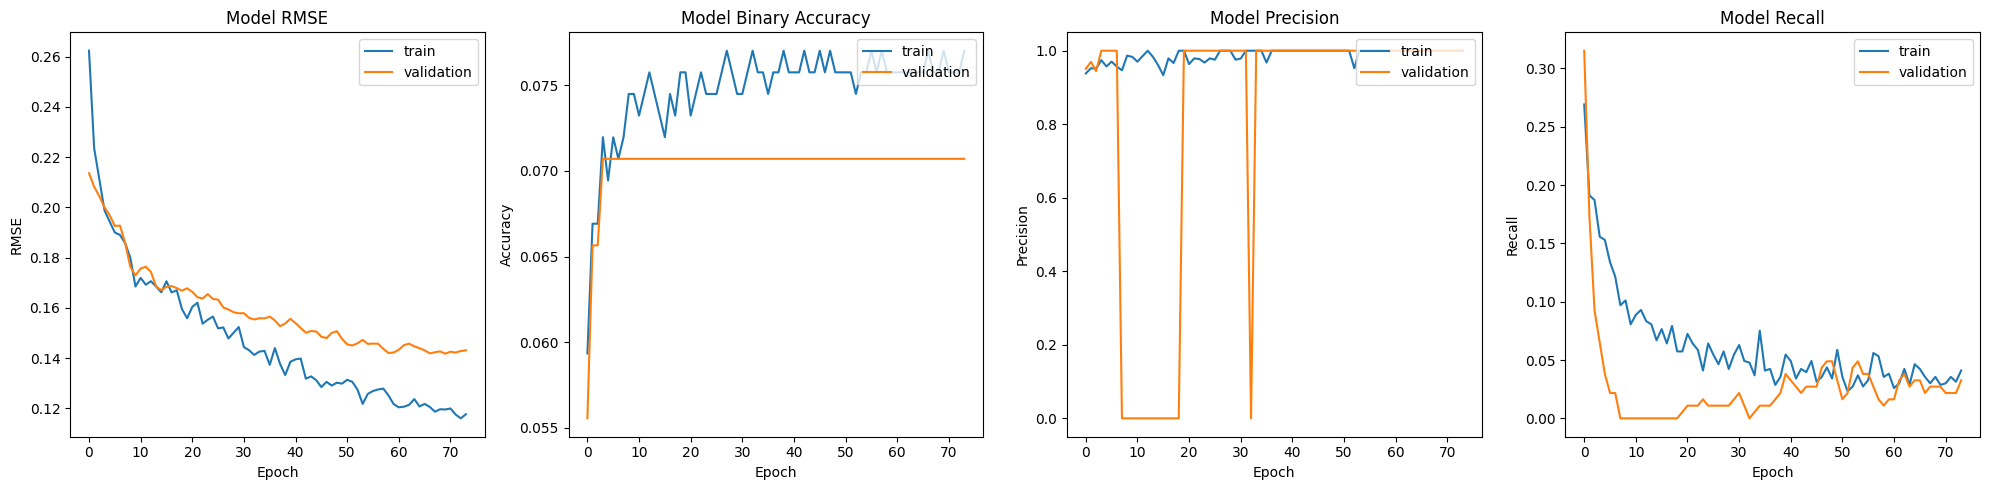

In [56]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

axes[0].plot(history.history['root_mean_squared_error'])
axes[0].plot(history.history['val_root_mean_squared_error'])
axes[0].set_title('Model RMSE')
axes[0].set_ylabel('RMSE')
axes[0].set_xlabel('Epoch')
axes[0].legend(['train', 'validation'], loc='upper right')

axes[1].plot(history.history['binary_accuracy'])
axes[1].plot(history.history['val_binary_accuracy'])
axes[1].set_title('Model Binary Accuracy')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].legend(['train', 'validation'], loc='upper right')

axes[2].plot(history.history['precision'])
axes[2].plot(history.history['val_precision'])
axes[2].set_title('Model Precision')
axes[2].set_ylabel('Precision')
axes[2].set_xlabel('Epoch')
axes[2].legend(['train', 'validation'], loc='upper right')

axes[3].plot(history.history['recall'])
axes[3].plot(history.history['val_recall'])
axes[3].set_title('Model Recall')
axes[3].set_ylabel('Recall')
axes[3].set_xlabel('Epoch')
axes[3].legend(['train', 'validation'], loc='upper right')

plt.tight_layout()
plt.show()

In [89]:
best_epoch_index = history.history['val_loss'].index(min(history.history['val_loss']))

final_rmse = history.history['root_mean_squared_error'][best_epoch_index]
final_binary_accuracy = history.history['binary_accuracy'][best_epoch_index]
final_precision = history.history['precision'][best_epoch_index]
final_recall = history.history['recall'][best_epoch_index]

print(best_epoch_index)
print(f"Nilai Akhir RMSE: {final_rmse:.4f}")
print(f"Nilai Akhir Binary Accuracy: {final_binary_accuracy:.4f}")
print(f"Nilai Akhir Precision: {final_precision:.4f}")
print(f"Nilai Akhir Recall: {final_recall:.4f}")

58
Nilai Akhir RMSE: 0.1252
Nilai Akhir Binary Accuracy: 0.0758
Nilai Akhir Precision: 1.0000
Nilai Akhir Recall: 0.0355


## Visualisasi Metrik

Hasil training model ditampilkan dalam bentuk visualisasi metrik performa yang diambil dari **Root Mean Squared Error (RMSE)** untuk menganalisis seberapa baik model belajar dan untuk mendeteksi adanya overfitting.

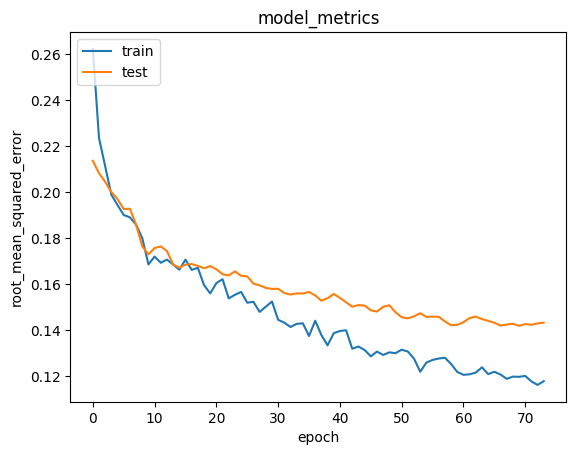

In [57]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Mendapatkan Rekomendasi Cellphone


Ini adalah tahap akhir dari proyek, yaitu penerapan model untuk menghasilkan rekomendasi. Kode di bawahnya akan mengambil ID pengguna secara acak, menggunakan model yang telah dilatih untuk memprediksi peringkat, dan menampilkan daftar 10 rekomendasi cellphone teratas.

In [59]:
cellphone_df = cellphone_new
df = pd.read_csv('/kaggle/input/cellphones-recommendations/cellphones ratings.csv')

user_id = df.user_id.sample(1).iloc[0]
cellphone_visited_by_user = df[df.user_id == user_id]

cellphone_not_visited = cellphone_df[~cellphone_df['id'].isin(cellphone_visited_by_user.cellphone_id.values)]['id']
cellphone_not_visited = list(
    set(cellphone_not_visited)
    .intersection(set(cellphone_to_cellphone_encoded.keys()))
)

cellphone_not_visited = [[cellphone_to_cellphone_encoded.get(x)] for x in cellphone_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_cellphone_array = np.hstack(
    ([[user_encoder]] * len(cellphone_not_visited), cellphone_not_visited)
)

In [60]:
ratings = model.predict(user_cellphone_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_cellphone_ids = [
    cellphone_encoded_to_cellphone.get(cellphone_not_visited[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('cellphone with high ratings from user')
print('----' * 8)

top_cellphone_user = (
    cellphone_visited_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .cellphone_id.values
)

cellphone_df_rows = cellphone_df[cellphone_df['id'].isin(top_cellphone_user)]
for row in cellphone_df_rows.itertuples():
    print(row.brand, ':', row.model)

print('----' * 8)
print('Top 10 cellphone recommendation')
print('----' * 8)

recommended_cellphone = cellphone_df[cellphone_df['id'].isin(recommended_cellphone_ids)]
for row in recommended_cellphone.itertuples():
    print(row.brand, ':', row.model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
Showing recommendations for users: 200
cellphone with high ratings from user
--------------------------------
OnePlus : 10 Pro
OnePlus : 10T
Motorola : Moto G Play (2021)
Motorola : Moto G Pure
Motorola : Moto G Power (2022)
--------------------------------
Top 10 cellphone recommendation
--------------------------------
Apple : iPhone SE (2022)
Apple : iPhone 13 Mini
Apple : iPhone 13
Apple : iPhone 13 Pro
Samsung : Galaxy S22
Samsung : Galaxy S22 Ultra
Google : Pixel 6  
Oppo : Find X5 Pro
Vivo : X80 Pro
Xiaomi : 12 Pro
